In [4]:
import csv
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [7]:
with open('./part3/results/losses-grimms', 'rb') as f:
    losses = pickle.load(f)
    
with open('./part3/results/accuracies-grimms', 'rb') as f:
    accuracies = pickle.load(f)

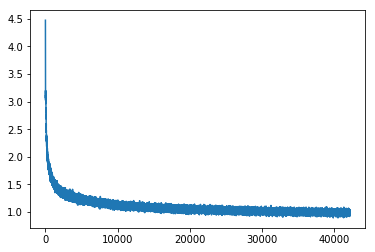

In [9]:
plt.plot(losses)

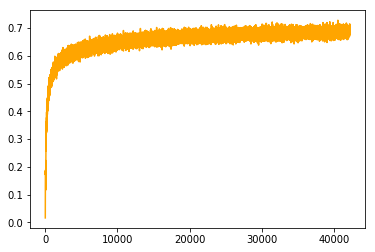

In [10]:
plt.plot(accuracies, color='orange')

In [ ]:
# Prepare dataset

final_text = ''
line_count = 0

with open('./part3/assets/scripts.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        
        sentence = '{}: {}\n'.format(row['Character'], row['Dialogue'])
        final_text += sentence

        line_count += 1
    print(f'Processed {line_count} lines.')
    
with open('./part3/assets/seinfeld.txt', 'w+') as f:
    f.write(final_text)

In [2]:
from part3.dataset import *


dataset = TextDataset('./part3/assets/seinfeld.txt', seq_length=30)
data_loader = DataLoader(dataset, 5, num_workers=1)

# print(dataset.char_dict)



# for step, (batch_inputs, batch_targets) in enumerate(data_loader):
#     print(len(batch_inputs))
#     print(len(batch_targets))
#     break


Initialize dataset with 3362231 characters, 97 unique.
{'1': 0, 'M': 1, '\n': 2, 'H': 3, '`': 4, '(': 5, '%': 6, '8': 7, 'w': 8, 'q': 9, '"': 10, 'C': 11, '-': 12, '\x93': 13, '$': 14, 'B': 15, 'X': 16, '[': 17, 'Y': 18, '~': 19, 'F': 20, 'R': 21, 'A': 22, 'n': 23, 'a': 24, 'x': 25, "'": 26, '7': 27, 'E': 28, 'd': 29, 'L': 30, '>': 31, '#': 32, '9': 33, '4': 34, ':': 35, ' ': 36, 'o': 37, '6': 38, 'u': 39, 'Z': 40, '=': 41, 'I': 42, '&': 43, 'W': 44, '\x91': 45, ']': 46, 'N': 47, 'h': 48, 'T': 49, '_': 50, '\x94': 51, ',': 52, 'j': 53, 'k': 54, '3': 55, '{': 56, 'G': 57, 'g': 58, 'O': 59, '2': 60, '5': 61, 'l': 62, 'y': 63, '?': 64, '}': 65, '<': 66, 'S': 67, 'V': 68, 'e': 69, 'J': 70, 'b': 71, 'z': 72, ';': 73, 't': 74, '\x92': 75, '*': 76, 'c': 77, 'p': 78, '.': 79, 'Q': 80, 'v': 81, '!': 82, '+': 83, 'm': 84, 'U': 85, '\\': 86, '/': 87, 'P': 88, 'K': 89, 'f': 90, 'i': 91, ')': 92, 'r': 93, '0': 94, 's': 95, 'D': 96}


In [ ]:
seq_length  = 3
input_dim   = 2
num_hidden  = 5
num_classes = 4
batch_size  = 10

In [ ]:
W_hx = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hidden,  input_dim)))
W_hh = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hidden,  num_hidden)))
W_ph = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_classes, num_hidden)))
b_h  = nn.Parameter(torch.ones(num_hidden))
b_p  = nn.Parameter(torch.ones(num_classes))

In [ ]:
x = torch.ones(input_dim)
h_t = torch.zeros(num_hidden)
p_t = torch.zeros(num_classes)
tanh = nn.Tanh()


h_t = tanh(torch.matmul(W_hx, x) + torch.matmul(W_hh, h_t) + b_h)
p_t = torch.matmul(W_ph, h_t) + b_p

print(p_t)

In [ ]:
a = torch.ones((128, 10))
b = torch.ones(10)

In [ ]:
a + b

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

In [ ]:
print(input.shape, target.shape)